In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [165]:
data=pd.read_csv('./dataset/prime.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Dropping Unwanted Columns
----

In [167]:
data.drop(columns={'show_id','description'},inplace=True)
data.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


Count of Missing Values
---

In [168]:
data.isnull().sum()[data.isnull().sum()>0]

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

Percentage of Missing Values
---

In [169]:
pn=((data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100).round(2).to_frame()
pn

,0
director,29.91
cast,9.37
country,9.44
date_added,0.11
rating,0.05
duration,0.03


In [170]:
pn10=pn[pn[0]<10].index.to_list()

<AxesSubplot: >

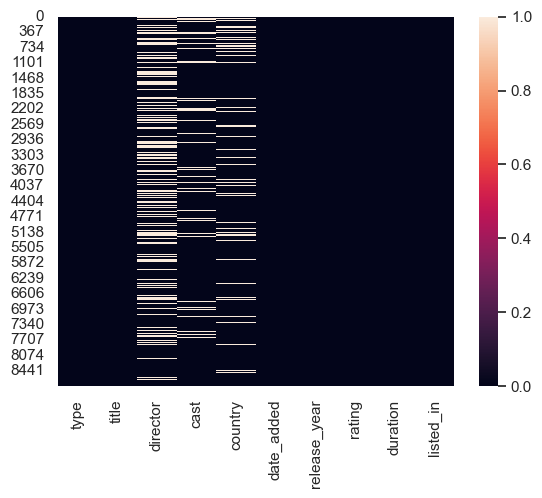

In [171]:
sb.heatmap(data.isnull())

Dropping Missing values in Columns which has less than 10% of missing values
---

In [172]:
data.dropna(subset=pn10,inplace=True)

In [173]:
((data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100).round(2)

director    26.86
dtype: float64

In [174]:
data['director'].fillna('Unavailable', inplace=True)
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7290 entries, 1 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7290 non-null   object
 1   title         7290 non-null   object
 2   director      7290 non-null   object
 3   cast          7290 non-null   object
 4   country       7290 non-null   object
 5   date_added    7290 non-null   object
 6   release_year  7290 non-null   int64 
 7   rating        7290 non-null   object
 8   duration      7290 non-null   object
 9   listed_in     7290 non-null   object
dtypes: int64(1), object(9)
memory usage: 626.5+ KB


Handling Duplicates
---

In [176]:
data.duplicated().sum()

0

EDA
---

Director column

In [177]:
len(data['director'].unique())

3946

Country Column

In [178]:
data['country'].value_counts().to_dict()

{'United States': 2479,
 'India': 940,
 'United Kingdom': 350,
 'Japan': 238,
 'South Korea': 196,
 'Canada': 162,
 'Spain': 127,
 'France': 106,
 'Egypt': 105,
 'Turkey': 105,
 'Mexico': 102,
 'Nigeria': 93,
 'Taiwan': 81,
 'Indonesia': 78,
 'Philippines': 75,
 'Australia': 75,
 'United States, Canada': 72,
 'United Kingdom, United States': 71,
 'Brazil': 68,
 'China': 66,
 'Germany': 61,
 'Thailand': 60,
 'Hong Kong': 53,
 'Argentina': 51,
 'United States, United Kingdom': 44,
 'Canada, United States': 42,
 'Italy': 41,
 'Colombia': 33,
 'South Africa': 28,
 'France, Belgium': 27,
 'Poland': 23,
 'Singapore': 23,
 'Malaysia': 20,
 'Pakistan': 18,
 'Netherlands': 18,
 'Hong Kong, China': 16,
 'United States, Germany': 16,
 'United States, Japan': 16,
 'United States, France': 15,
 'Lebanon': 15,
 'China, Hong Kong': 14,
 'Chile': 14,
 'Russia': 13,
 'Sweden': 13,
 'Germany, United States': 13,
 'Denmark': 13,
 'United Arab Emirates': 13,
 'Mexico, United States': 12,
 'Japan, United S

Creating a new column named "screened_country_count"

In [179]:
def count_ext(x):
    return len(x.split(','))
data['screened_country_count']=data['country'].apply(count_ext)
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,screened_country_count
1,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1
4,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",1
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",6
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",1
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",1


In [180]:
movie_count=data['type'].value_counts()[0]
tvshow_count=data['type'].value_counts()[1]

In [181]:
fig = px.bar(x =['Movies','TV Show'], y = [movie_count,tvshow_count])
fig.update_layout(
    xaxis_title="Content Type",
    yaxis_title="Number of Titles screened",
)
fig.update_traces(marker_color=['red', 'blue'])
fig.show()


No of Titles under each rating

[Text(0, 0, '2657'),
 Text(0, 0, '1755'),
 Text(0, 0, '470'),
 Text(0, 0, '222'),
 Text(0, 0, '275'),
 Text(0, 0, '779'),
 Text(0, 0, '653'),
 Text(0, 0, '209'),
 Text(0, 0, '158'),
 Text(0, 0, '40'),
 Text(0, 0, '3'),
 Text(0, 0, '62'),
 Text(0, 0, '4'),
 Text(0, 0, '3')]

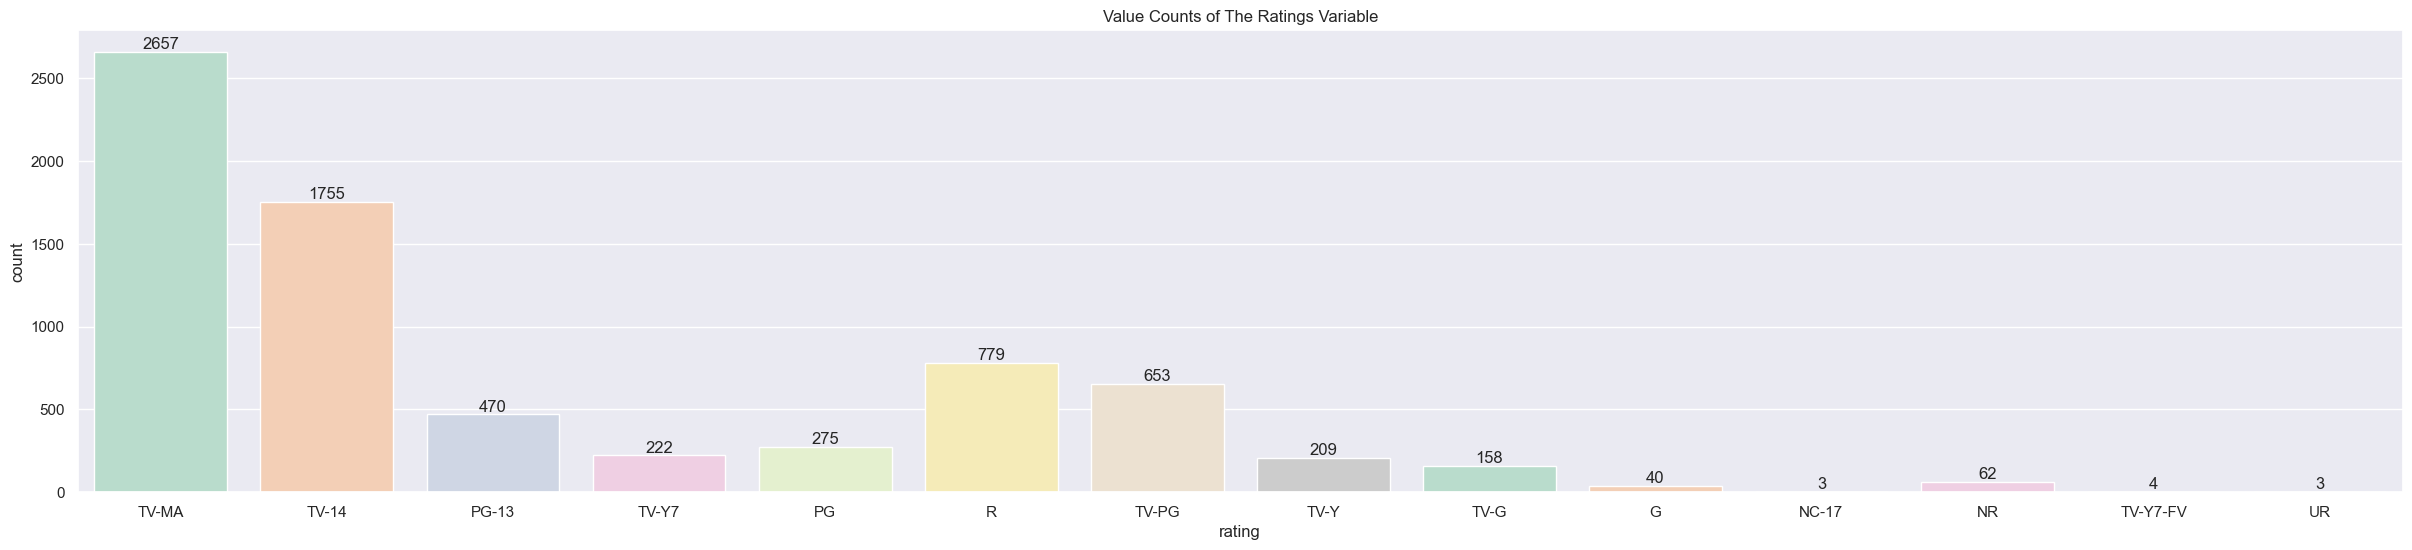

In [182]:
plt.figure(figsize=(30,6))
plt.title("Value Counts of The Ratings Variable")
sb.set(style="darkgrid")
ax = sb.countplot(x="rating", data=data, palette="Pastel2")
ax.bar_label(ax.containers[0])

In [183]:
data['date_added'].value_counts()

January 1, 2020      101
November 1, 2019      82
March 1, 2018         72
December 31, 2019     69
October 1, 2018       63
                    ... 
November 29, 2020      1
August 5, 2016         1
August 2, 2016         1
December 13, 2020      1
January 11, 2020       1
Name: date_added, Length: 1673, dtype: int64

In [184]:
yd=data['release_year'].value_counts().head(5).reset_index().rename(columns={'index':'year','release_year':'count'})
yd

,year,count
0,2018,935
1,2017,862
2,2019,822
3,2016,751
4,2020,744


In [185]:
fig = px.bar(yd,x ='year', y = 'count')
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Titles screened",
)
fig.show()

In [186]:
data['rating'].value_counts()

TV-MA       2657
TV-14       1755
R            779
TV-PG        653
PG-13        470
PG           275
TV-Y7        222
TV-Y         209
TV-G         158
NR            62
G             40
TV-Y7-FV       4
NC-17          3
UR             3
Name: rating, dtype: int64

Titles which has screened in more than 5 countries
---

In [187]:
data[data['screened_country_count']>5]['title'].to_list()

['Sankofa',
 'Shaun the Sheep',
 'The Professor and the Madman',
 'The Take',
 'Wadjda',
 'Arctic Dogs',
 'The Danish Girl',
 'The Command',
 'Ultimate Beastmaster',
 'Beyond Skyline',
 'A Sort of Family',
 'Another Forever',
 'Domino',
 'Frozen Planet',
 'Frozen Planet: On Thin Ice',
 'Frozen Planet: The Epic Journey',
 'Nymphomaniac: Volume II',
 'The Breadwinner',
 'The Congress',
 'The Making of Frozen Planet']